In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and log combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

593

In [3]:
# URL for GET requests to retrieve weather data

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls
#Include a print log of each city as it's being processed (with the city number and city name).

city_info = []
counter = 0

# for loop to loop through pandas dataframe and convert to json

for city in cities:
#for city in cities[0:5]:
    city_url = url + "&q=" + city
    counter = counter + 1
    
    
    try:
        
        json_data = requests.get(city_url).json()
        
        city_name = json_data["name"]
        lat = json_data["coord"]["lat"]
        lon = json_data["coord"]["lon"]
        wind = json_data["wind"]["speed"]
        temp_max = json_data["main"]["temp_max"]
        humidity = json_data["main"]["humidity"]
        country = json_data["sys"]["country"]
        date = json_data["dt"]
        cloud = json_data["clouds"]["all"]
        

        city_info.append({
            "city_name": city_name,
            "Lat": lat,
            "Lon": lon,
            "wind": wind,
            "temp_max": temp_max,
            "humidity": humidity,
            "country": country,
            "date": date,
            "cloud": cloud,
           
        })
        
        print(f"Processing Record {counter} of Set {counter} | {city}")
        #sleep(1)

    except:
        print("Not found")
        pass

print("Done")




    
    
    

Processing Record 1 of Set 1 | mayo
Processing Record 2 of Set 2 | grand gaube
Processing Record 3 of Set 3 | avarua
Processing Record 4 of Set 4 | shelburne
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 6 | deputatskiy
Processing Record 7 of Set 7 | thompson
Processing Record 8 of Set 8 | rikitea
Processing Record 9 of Set 9 | rio gallegos
Processing Record 10 of Set 10 | georgetown
Processing Record 11 of Set 11 | caravelas
Processing Record 12 of Set 12 | roald
Processing Record 13 of Set 13 | vostok
Processing Record 14 of Set 14 | lorengau
Processing Record 15 of Set 15 | mataura
Not found
Processing Record 17 of Set 17 | ushuaia
Processing Record 18 of Set 18 | ilulissat
Processing Record 19 of Set 19 | anloga
Processing Record 20 of Set 20 | dikson
Processing Record 21 of Set 21 | ambon
Processing Record 22 of Set 22 | batticaloa
Processing Record 23 of Set 23 | hobart
Processing Record 24 of Set 24 | cherskiy
Processing Record 25 of Set 25 | vaini
Proc

Processing Record 202 of Set 202 | opotiki
Processing Record 203 of Set 203 | yar-sale
Processing Record 204 of Set 204 | kautokeino
Processing Record 205 of Set 205 | klaksvik
Processing Record 206 of Set 206 | khatanga
Processing Record 207 of Set 207 | ust-kuyga
Processing Record 208 of Set 208 | lahuachaca
Processing Record 209 of Set 209 | kenora
Processing Record 210 of Set 210 | clyde river
Processing Record 211 of Set 211 | codrington
Processing Record 212 of Set 212 | sobolevo
Processing Record 213 of Set 213 | gat
Processing Record 214 of Set 214 | souillac
Processing Record 215 of Set 215 | shimoda
Processing Record 216 of Set 216 | peleduy
Processing Record 217 of Set 217 | yellowknife
Processing Record 218 of Set 218 | brookings
Not found
Processing Record 220 of Set 220 | sault sainte marie
Processing Record 221 of Set 221 | denpasar
Processing Record 222 of Set 222 | nuuk
Processing Record 223 of Set 223 | ngunguru
Processing Record 224 of Set 224 | mawlaik
Processing Re

Processing Record 399 of Set 399 | te anau
Processing Record 400 of Set 400 | wittmund
Processing Record 401 of Set 401 | minervino murge
Processing Record 402 of Set 402 | port macquarie
Processing Record 403 of Set 403 | shihezi
Processing Record 404 of Set 404 | thyolo
Processing Record 405 of Set 405 | ayagoz
Processing Record 406 of Set 406 | prikubanskiy
Processing Record 407 of Set 407 | hithadhoo
Processing Record 408 of Set 408 | san vicente
Processing Record 409 of Set 409 | thinadhoo
Processing Record 410 of Set 410 | aripuana
Processing Record 411 of Set 411 | san pedro
Processing Record 412 of Set 412 | sakaiminato
Processing Record 413 of Set 413 | kununurra
Processing Record 414 of Set 414 | biasca
Processing Record 415 of Set 415 | ruwi
Processing Record 416 of Set 416 | rantauprapat
Processing Record 417 of Set 417 | svelgen
Processing Record 418 of Set 418 | zhigansk
Processing Record 419 of Set 419 | auki
Processing Record 420 of Set 420 | mount isa
Processing Record

In [5]:
# Display the DataFrame

city_info_df = pd.DataFrame(city_info)


# Export the city data into a .csv.

city_info_df.to_csv(output_data_file, index_label="City_ID")
city_info_df

,city_name,Lat,Lon,wind,temp_max,humidity,country,date,cloud
0,Mayo,38.89,-76.51,3.36,35.01,71,US,1581231806,1
1,Grand Gaube,-20.01,57.66,11.41,82.99,65,MU,1581231806,40
2,Avarua,-21.21,-159.78,15.17,80.60,88,CK,1581231807,100
3,Shelburne,44.08,-80.20,6.93,16.00,72,CA,1581231623,75
4,Leningradskiy,69.38,178.42,22.10,-20.92,91,RU,1581231813,100
...,...,...,...,...,...,...,...,...,...
547,Lagoa,39.05,-27.98,21.39,62.13,86,PT,1581232002,100
548,Sarishabari,24.73,89.83,12.66,79.50,25,BD,1581232002,24
549,Nova Odesa,47.31,31.79,1.57,22.68,80,UA,1581232002,8
550,Manaus,-3.10,-60.02,2.24,78.80,78,BR,1581231884,91


In [6]:
# assign variables

lat = city_info_df["Lat"]
lon = city_info_df["Lat"]
wind = city_info_df["wind"]
temp_max = city_info_df["temp_max"]
humidity = city_info_df["humidity"]
country = city_info_df["country"]
date = city_info_df["date"]
cloud = city_info_df["cloud"]


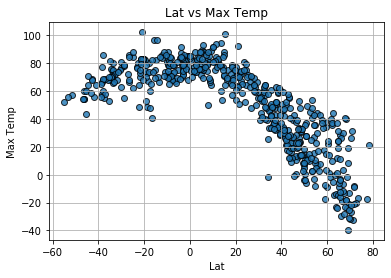

In [7]:
# create scatter plot for Lat vs Max Temp

plt.scatter(lat, temp_max, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig1.png")

plt.show()

In [8]:
# There appears to be a negative linear coorilation between temperature and latitude. For the most part, 
# as latitude increased, temperature decreased

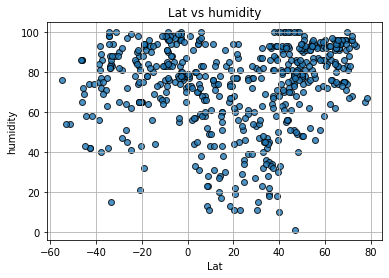

In [9]:
# create scatter plot for Lat vs humidity

# does not look the same as GitLab hw sample

plt.scatter(lat, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs humidity")
plt.ylabel("humidity")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig2.png")
plt.show()

In [10]:
# The observations are scattered throughout the graph and there appears to be no coorilation between latitude and humidity

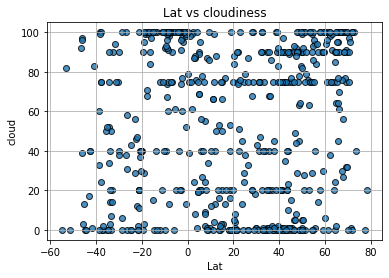

In [11]:
# Create scatter plot for lat vs cloudiness

plt.scatter(lat, cloud, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs cloudiness")
plt.ylabel("cloud")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()

In [12]:
# There appears to be no relationship between latitude and cloudiness. Some of the observations are clustered  with 
# latitude increasing nd cloudiness remaining contant

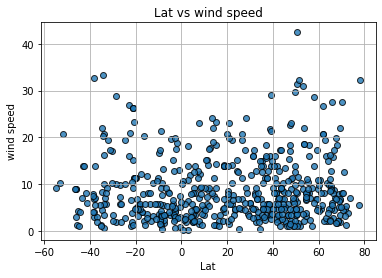

In [13]:
# Create scatter plot for lat vs windiness

plt.scatter(lat, wind, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs wind speed")
plt.ylabel("wind speed")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig4.png")
plt.show()

In [14]:
# There appears to be no relationship between latitude and wind speed. The graph shows as the latitude increases, wind 
# speed remains low. We have some outliers here that may be throwing the data off so for further analysis, we might want to 
# delete the outliers in the upper right-hand corner (68, 41) and in the far left-hand, middle (-58, 20) of graph for a truer representation 
# of the data.


plt.scatter(lat, cloud, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs cloud")
plt.ylabel("cloud")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()

The r-squared is: -0.7698577013969865
pvalue: 2.38056925879902e-109


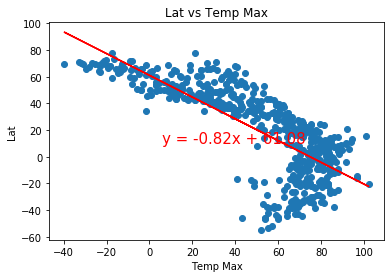

In [15]:
# Create linear regression for Lat vs Max Temp

x_values = temp_max
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp Max')
plt.ylabel('Lat')
plt.title("Lat vs Temp Max")
print(f"The r-squared is: {rvalue}")

print(f"pvalue: {pvalue}")

plt.show()


In [16]:
# With a low R-squared value, the model does not explain much of the variation of the data and it is not significant

The r-squared is: 0.0825428651640685
pvalue: 0.0525950946125164


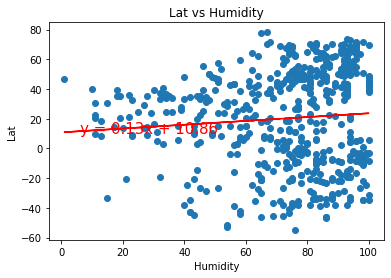

In [17]:
# create linear regression for Lat vs Humidity

x_values = humidity
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.title("Lat vs Humidity")
print(f"The r-squared is: {rvalue}")
print(f"pvalue: {pvalue}")
plt.show()

In [18]:
# It appears that latitude has no relationship with humidity. The graph shows that humidity is not really affected by a 
# change in latitude. The model explains only 8 percent of variation of the data and it is not significant 

The r-squared is: 0.09665596520094565
pvalue: 0.023142569612692912


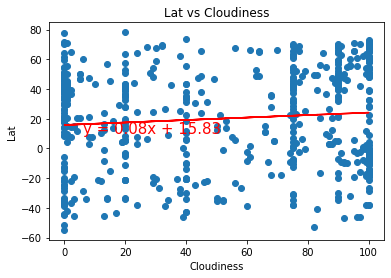

In [19]:
# create linear regress for Lat vs Cloudiness

x_values = cloud
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.title("Lat vs Cloudiness")
print(f"The r-squared is: {rvalue}")
print(f"pvalue: {pvalue}")
plt.show()

In [ ]:
# With a low R-squared value and a low p-value, the model doesn't explain much of variation of the data but it is 
# significant

The r-squared is: 0.03529279208177125
pvalue: 0.40791347545794565


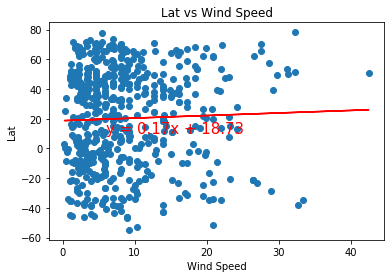

In [20]:
# Create a linear regression for Lat vs Wind Speed

x_values = wind
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.title("Lat vs Wind Speed")
print(f"The r-squared is: {rvalue}")
print(f"pvalue: {pvalue}")

plt.show()

In [ ]:
# with a low R-squared value and a high p-value, the model doesn't explain much of variation of the data 
# and it is not significant. 